In [3]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [ ]:
import pandas as pd

import sys
import os

sys.path.append(os.path.abspath(".."))

from src import preprocessing
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
df = pd.read_csv("../data/tweets.csv")
print(df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [8]:
# Créer une colonne clean_text
df["clean_text"] = df["text"].apply(preprocessing.clean_text)

# Vérifier le résultat pour quelques tweets
df[["text", "clean_text"]].sample(5)

,text,clean_text
4558,#BreakingNews Militants attack Udhampur police...,breakingnews militant attack udhampur police p...
5288,Wow-the name #LegionnairesDisease comes from a...,wow-the name legionnairesdisease come outbreak...
5258,Hannah: 'Hiroshima sounds like it could be a p...,hannah hiroshima sound like could place china ...
4330,Criminals Who Hijack Lorries And Buses Arreste...,criminal hijack lorry bus arrested enugu photo...
6618,Truth...\nhttps://t.co/2Y4RGob7pj\n#News\n#BBC...,truth http t.co/2y4rgob7pj news bbc cnn islam ...


In [9]:
# Analyser le corpus

# Transformer en liste
corpus = df["clean_text"].tolist()

# Obtenir les stats
stats = preprocessing.corpus_statistics(corpus)

print(f"Nombre total de tokens : {stats['total_tokens']}")
print(f"Nombre de tokens uniques : {stats['unique_tokens']}")
print(f"Nombre de tokens apparaissant une seule fois : {stats['single_occurrence']}")


Nombre total de tokens : 77130
Nombre de tokens uniques : 20604
Nombre de tokens apparaissant une seule fois : 14718


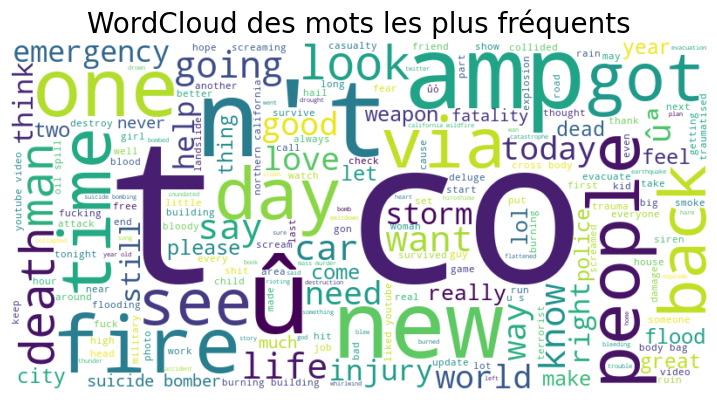

In [11]:
# Générer un WordCloud
text = " ".join(corpus)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher avec matplotlib
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud des mots les plus fréquents", fontsize=20)
plt.show()


In [13]:
#exemples pour contrôle qualité
for i in df.sample(5).index:
    print(f"Original : {df.loc[i, 'text']}")
    print(f"Nettoyé  : {df.loc[i, 'clean_text']}")
    print("-----")

Original : RT patrickjbutler: Excellent damiengayle eyewitness account of Kids Company closure: 'You drop the bomb and expectÛ_ http://t.co/pHH1VmLfoo
Nettoyé  : patrickjbutler excellent damiengayle eyewitness account kid company closure drop bomb expectû http t.co/phh1vmlfoo
-----
Original : Inciweb OR Update:  Rogue River-Siskiyou National Forest Fires  8/5/15 12:00 PM (Rogue River-Siskiyou NF AreaÛ_ http://t.co/LkwxU8QV7n
Nettoyé  : inciweb update rogue river-siskiyou national forest fire 8/5/15 12:00 rogue river-siskiyou areaû http t.co/lkwxu8qv7n
-----
Original : #BBSNews latest 4 #Palestine &amp; #Israel -  Six Palestinians Kidnapped in West Bank Hebron Home Demolished http://t.co/gne1fW0XHE
Nettoyé  : bbsnews latest palestine amp israel six palestinian kidnapped west bank hebron home demolished http t.co/gne1fw0xhe
-----
Original : Ppl like unu feast today and famine tomorrow
Nettoyé  : ppl like unu feast today famine tomorrow
-----
Original : In the movie 'Titanic' Jack and